<a href="https://colab.research.google.com/github/sandhya-bdb/CNN-model-for-Fruit-Classification-using-ResNet50/blob/main/model_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/sandhya-bdb/CNN-model-for-Fruit-Classification-using-ResNet50/blob/main/week_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Dataset: Begin by loading the dataset provided.
# Data Augmentation: Apply transformations such as random flip, rotation, color jitter, resizing, etc., to augment the data and enhance model performance.
# Dataset Splitting: Split the dataset into training, validation, and testing sets.
# Visualization: Visualize a few images from the dataset to develop an understanding of the data.

In [2]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import time
import torchvision.models as models
from matplotlib import pyplot as plt

In [3]:
device = torch.device("cuda" )
device

device(type='cuda')

In [4]:
image_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [5]:
import os
os.listdir('/content')




['.config', '.ipynb_checkpoints', 'dataset.zip', 'sample_data']

In [6]:
!ls -a /content


.  ..  .config	dataset.zip  .ipynb_checkpoints  sample_data


In [7]:
!ls -a /content/dataset


ls: cannot access '/content/dataset': No such file or directory


In [8]:
!unzip /content/dataset.zip -d /content/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/FRUIT-16K/S_Lemon/458.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/935.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/89.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/1000.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/773.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/692.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/854.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/575.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/737.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/656.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/494.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/818.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/100.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/971.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/1.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/890.jpg  
  inflating: /content/d

In [9]:
dataset_path = "/content/dataset/FRUIT-16K"


In [10]:
dataset = datasets.ImageFolder(root=dataset_path, transform=image_transforms)
print(f"Classes found: {dataset.classes}")
print(f"Number of classes: {len(dataset.classes)}")
print(f"Number of samples: {len(dataset)}")


Classes found: ['F_Banana', 'F_Lemon', 'F_Lulo', 'F_Mango', 'F_Orange', 'F_Strawberry', 'F_Tamarillo', 'F_Tomato', 'S_Banana', 'S_Lemon', 'S_Lulo', 'S_Mango', 'S_Orange', 'S_Strawberry', 'S_Tamarillo', 'S_Tomato']
Number of classes: 16
Number of samples: 16000


In [11]:
class_names = dataset.classes
class_names

['F_Banana',
 'F_Lemon',
 'F_Lulo',
 'F_Mango',
 'F_Orange',
 'F_Strawberry',
 'F_Tamarillo',
 'F_Tomato',
 'S_Banana',
 'S_Lemon',
 'S_Lulo',
 'S_Mango',
 'S_Orange',
 'S_Strawberry',
 'S_Tamarillo',
 'S_Tomato']

In [12]:
num_classes = len(dataset.classes)
num_classes

16

In [13]:
train_size = int(0.75*len(dataset))
val_size = len(dataset) - train_size

train_size, val_size

(12000, 4000)

In [14]:
from torch.utils.data import random_split

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [15]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

In [16]:
for images, labels in train_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([32, 3, 224, 224])
torch.Size([32])


In [17]:
labels[10]

tensor(10)

In [18]:
images[10].shape

torch.Size([3, 224, 224])

In [19]:
images[10].permute(1,2,0).shape

torch.Size([224, 224, 3])

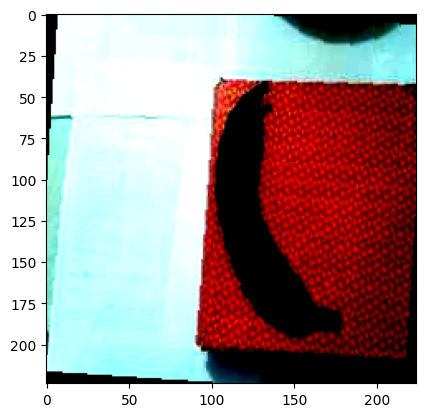

In [20]:
plt.imshow(images[0].permute(1,2,0))
plt.show()

In [21]:
images[30].permute(1,2,0).shape

torch.Size([224, 224, 3])

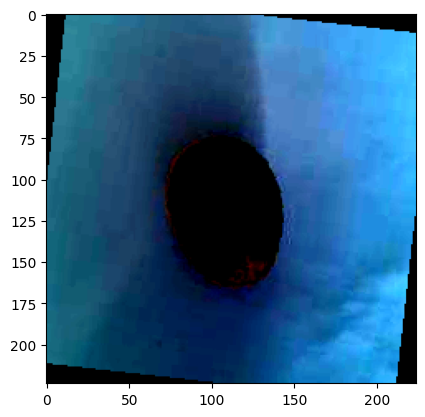

In [22]:
plt.imshow(images[30].permute(1,2,0))
plt.show()

In [23]:
images[15].permute(1,2,0).shape

torch.Size([224, 224, 3])

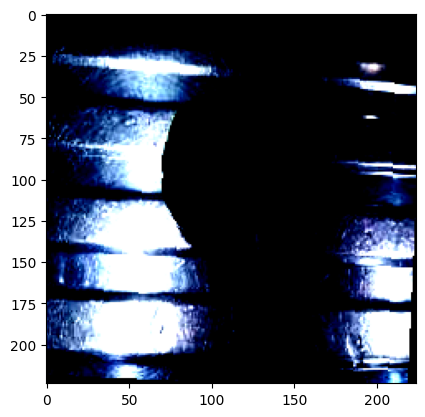

In [24]:
plt.imshow(images[15].permute(1,2,0))
plt.show()

In [25]:
#Tasks:
#Model Training: Begin by building a CNN model. For this task, avoid using transfer learning or regularization techniques initially.
#Validation and Testing: Evaluate the model on both validation and test datasets.
#Optimize Epochs: Experiment with different numbers of training epochs.

In [26]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


## model 1: CNN

In [27]:
class FruitClassifierCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1), # (16, 224, 224)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0), # (16, 112, 112),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0), # (32, 56, 56)
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0), # (64, 28, 28),
            nn.Flatten(),
            nn.Linear(64*28*28, 512),
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.network(x)
        return x

In [28]:
images.size(0)

32

In [29]:
len(train_loader.dataset)

12000

In [30]:
# 1) DataLoaders with single-threaded loading (helps with notebook timeouts)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0)

def train_model(model, criterion, optimizer, train_loader, val_loader, device, epochs=3):
    import time
    start = time.time()

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for batch_num, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

            if (batch_num + 1) % 10 == 0:
                print(f"Batch: {batch_num+1}, Epoch: {epoch+1}, Loss: {loss.item():0.4f}")

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch [{epoch+1}/{epochs}], Avg Loss: {epoch_loss:.4f}")

        model.eval()
        correct, total = 0, 0
        all_labels, all_predictions = [], []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())

        val_accuracy = 100.0 * correct / total if total > 0 else 0.0
        print(f"*** Validation Accuracy: {val_accuracy:.2f}% ***")

    end = time.time()
    print(f"Execution time: {end - start:.2f} seconds")

    return all_labels, all_predictions


In [31]:
model = FruitClassifierCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
all_labels, all_predictions = train_model(
    model, criterion, optimizer,
    train_loader, val_loader, device,
    epochs=3
)


Batch: 10, Epoch: 1, Loss: 2.7546
Batch: 20, Epoch: 1, Loss: 2.6299
Batch: 30, Epoch: 1, Loss: 2.4389
Batch: 40, Epoch: 1, Loss: 1.8392
Batch: 50, Epoch: 1, Loss: 1.9265
Batch: 60, Epoch: 1, Loss: 1.3598
Batch: 70, Epoch: 1, Loss: 1.4093
Batch: 80, Epoch: 1, Loss: 1.5748
Batch: 90, Epoch: 1, Loss: 1.2778
Batch: 100, Epoch: 1, Loss: 1.0466
Batch: 110, Epoch: 1, Loss: 1.4147
Batch: 120, Epoch: 1, Loss: 0.8561
Batch: 130, Epoch: 1, Loss: 0.7826
Batch: 140, Epoch: 1, Loss: 1.1823
Batch: 150, Epoch: 1, Loss: 0.9947
Batch: 160, Epoch: 1, Loss: 0.9912
Batch: 170, Epoch: 1, Loss: 0.6192
Batch: 180, Epoch: 1, Loss: 0.8554
Epoch [1/3], Avg Loss: 1.5047
*** Validation Accuracy: 73.88% ***
Batch: 10, Epoch: 2, Loss: 0.6715
Batch: 20, Epoch: 2, Loss: 0.8044
Batch: 30, Epoch: 2, Loss: 0.9151
Batch: 40, Epoch: 2, Loss: 0.6350
Batch: 50, Epoch: 2, Loss: 0.8487
Batch: 60, Epoch: 2, Loss: 0.5611
Batch: 70, Epoch: 2, Loss: 0.5936
Batch: 80, Epoch: 2, Loss: 0.7554
Batch: 90, Epoch: 2, Loss: 0.4380
Batch: 

In [32]:
#Training and Validation: Plot training and validation accuracy to check for overfitting.
#Regularization Techniques: Apply techniques like batch normalization, weight decay, dropout, and early stopping to improve model performance.
#Hyperparameter Tuning: Experiment with hyperparameters to further increase accuracy.
#Model Saving: Save the best-performing model for future use.

## Model2: CNN with Regularization

In [33]:
class FruitClassifierCNNWithRegularization(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1), # (16, 224, 224)
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0), # (16, 112, 112),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0), # (32, 56, 56)
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0), # (64, 28, 28),
            nn.Flatten(),
            nn.Linear(64*28*28, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.network(x)
        return x

In [34]:
model = FruitClassifierCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
all_labels, all_predictions = train_model(
    model, criterion, optimizer,
    train_loader, val_loader, device,
    epochs=3
)

Batch: 10, Epoch: 1, Loss: 2.7438
Batch: 20, Epoch: 1, Loss: 2.5900
Batch: 30, Epoch: 1, Loss: 2.4345
Batch: 40, Epoch: 1, Loss: 1.6891
Batch: 50, Epoch: 1, Loss: 1.5882
Batch: 60, Epoch: 1, Loss: 1.3349
Batch: 70, Epoch: 1, Loss: 1.3041
Batch: 80, Epoch: 1, Loss: 1.2413
Batch: 90, Epoch: 1, Loss: 1.3341
Batch: 100, Epoch: 1, Loss: 1.1698
Batch: 110, Epoch: 1, Loss: 0.9281
Batch: 120, Epoch: 1, Loss: 1.0975
Batch: 130, Epoch: 1, Loss: 1.0576
Batch: 140, Epoch: 1, Loss: 0.6326
Batch: 150, Epoch: 1, Loss: 0.9944
Batch: 160, Epoch: 1, Loss: 0.7752
Batch: 170, Epoch: 1, Loss: 0.7834
Batch: 180, Epoch: 1, Loss: 0.9877
Epoch [1/3], Avg Loss: 1.4100
*** Validation Accuracy: 70.58% ***
Batch: 10, Epoch: 2, Loss: 0.5941
Batch: 20, Epoch: 2, Loss: 1.0452
Batch: 30, Epoch: 2, Loss: 0.9390
Batch: 40, Epoch: 2, Loss: 0.5699
Batch: 50, Epoch: 2, Loss: 0.8495
Batch: 60, Epoch: 2, Loss: 0.8181
Batch: 70, Epoch: 2, Loss: 0.6169
Batch: 80, Epoch: 2, Loss: 0.4913
Batch: 90, Epoch: 2, Loss: 0.4864
Batch: 

In [35]:
#Apply Transfer Learning: Use a pre-trained model like ResNet50 to train the model.
#Save the Model: Save the trained model to disk for future use.


##model 3: CNN with ResNet50


In [36]:
# Load the pre-trained ResNet model
class FruitClassifierResNet(nn.Module):
    def __init__(self, num_classes, dropout_rate=0.5):
        super().__init__()
        self.model = models.resnet50(weights='DEFAULT')
        # Freeze all layers except the final fully connected layer
        for param in self.model.parameters():
            param.requires_grad = False

        # Unfreeze layer4 and fc layers
        for param in self.model.layer4.parameters():
            param.requires_grad = True

        # Replace the final fully connected layer
        self.model.fc = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.model.fc.in_features, num_classes)
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [37]:
model = FruitClassifierCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

all_labels, all_predictions = train_model(
    model, criterion, optimizer,
    train_loader, val_loader, device,
    epochs=3
)





Batch: 10, Epoch: 1, Loss: 2.6842
Batch: 20, Epoch: 1, Loss: 2.3240
Batch: 30, Epoch: 1, Loss: 2.1589
Batch: 40, Epoch: 1, Loss: 1.7555
Batch: 50, Epoch: 1, Loss: 1.4330
Batch: 60, Epoch: 1, Loss: 1.4304
Batch: 70, Epoch: 1, Loss: 1.1664
Batch: 80, Epoch: 1, Loss: 1.3938
Batch: 90, Epoch: 1, Loss: 1.0629
Batch: 100, Epoch: 1, Loss: 1.0029
Batch: 110, Epoch: 1, Loss: 0.9230
Batch: 120, Epoch: 1, Loss: 0.9049
Batch: 130, Epoch: 1, Loss: 0.7814
Batch: 140, Epoch: 1, Loss: 0.9200
Batch: 150, Epoch: 1, Loss: 0.8696
Batch: 160, Epoch: 1, Loss: 0.6712
Batch: 170, Epoch: 1, Loss: 0.7619
Batch: 180, Epoch: 1, Loss: 0.6986
Epoch [1/3], Avg Loss: 1.3124
*** Validation Accuracy: 77.15% ***
Batch: 10, Epoch: 2, Loss: 0.5871
Batch: 20, Epoch: 2, Loss: 0.6934
Batch: 30, Epoch: 2, Loss: 0.4998
Batch: 40, Epoch: 2, Loss: 0.5990
Batch: 50, Epoch: 2, Loss: 0.5677
Batch: 60, Epoch: 2, Loss: 0.6179
Batch: 70, Epoch: 2, Loss: 0.5584
Batch: 80, Epoch: 2, Loss: 0.4797
Batch: 90, Epoch: 2, Loss: 0.5335
Batch: 

## model 4 : CNN with hyperparameter tuning ResNet50


In [51]:
model = FruitClassifierResNet(num_classes=num_classes, dropout_rate=0.4).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.00001)


all_labels, all_predictions = train_model(
    model, criterion, optimizer,
    train_loader, val_loader, device,
    epochs=3
)


Batch: 10, Epoch: 1, Loss: 2.7387
Batch: 20, Epoch: 1, Loss: 2.7739
Batch: 30, Epoch: 1, Loss: 2.7173
Batch: 40, Epoch: 1, Loss: 2.7589
Batch: 50, Epoch: 1, Loss: 2.7292
Batch: 60, Epoch: 1, Loss: 2.6944
Batch: 70, Epoch: 1, Loss: 2.6499
Batch: 80, Epoch: 1, Loss: 2.6169
Batch: 90, Epoch: 1, Loss: 2.5777
Batch: 100, Epoch: 1, Loss: 2.5801
Batch: 110, Epoch: 1, Loss: 2.5053
Batch: 120, Epoch: 1, Loss: 2.4534
Batch: 130, Epoch: 1, Loss: 2.3387
Batch: 140, Epoch: 1, Loss: 2.3593
Batch: 150, Epoch: 1, Loss: 2.3059
Batch: 160, Epoch: 1, Loss: 2.1415
Batch: 170, Epoch: 1, Loss: 2.1861
Batch: 180, Epoch: 1, Loss: 2.1716
Epoch [1/3], Avg Loss: 2.5119
*** Validation Accuracy: 82.47% ***
Batch: 10, Epoch: 2, Loss: 1.8776
Batch: 20, Epoch: 2, Loss: 1.8084
Batch: 30, Epoch: 2, Loss: 1.7735
Batch: 40, Epoch: 2, Loss: 1.7197
Batch: 50, Epoch: 2, Loss: 1.6031
Batch: 60, Epoch: 2, Loss: 1.5102
Batch: 70, Epoch: 2, Loss: 1.3951
Batch: 80, Epoch: 2, Loss: 1.3620
Batch: 90, Epoch: 2, Loss: 1.3450
Batch: 

## Model Evaluation using Confusion Matrix and Classification Report


In [52]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       0.97      1.00      0.99       230
           2       0.98      1.00      0.99       262
           3       0.99      0.98      0.99       259
           4       0.98      0.99      0.99       256
           5       1.00      1.00      1.00       237
           6       1.00      0.99      0.99       252
           7       0.99      1.00      0.99       282
           8       1.00      1.00      1.00       251
           9       1.00      0.97      0.98       236
          10       0.98      0.98      0.98       264
          11       1.00      1.00      1.00       249
          12       0.99      0.98      0.98       256
          13       1.00      1.00      1.00       247
          14       0.98      0.99      0.99       239
          15       0.99      0.98      0.99       230

    accuracy                           0.99      4000
   macro avg       0.99   

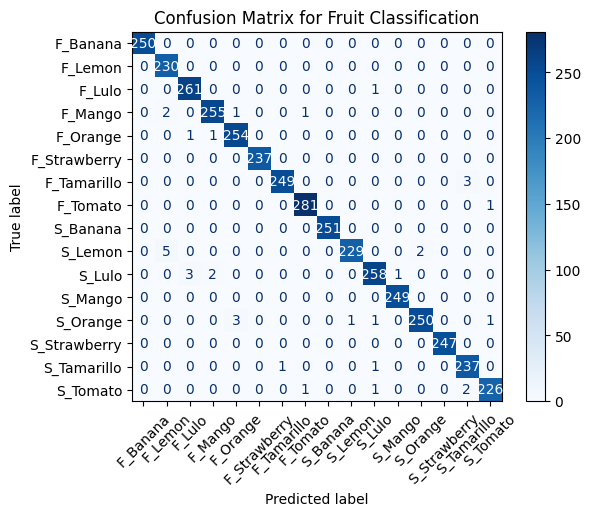

In [53]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

conf_matrix = confusion_matrix(all_labels, all_predictions, labels=np.arange(num_classes))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix for Fruit Classification")
plt.show()

## Saving the model

In [54]:
torch.save(model.state_dict(), 'saved_model.pth')